In [1]:
%matplotlib inline
from lexer import LangLexer
from parser import LangParser
from comb_parser import WhileCheckCorr
import datetime
import matplotlib.pyplot as plt
import seaborn as sn

Parser debugging for LangParser written to parser.out


In [2]:
test_string = 'let i=1; let a=0; while i<=2 { a+=1; a+=1; }'

In [3]:
lex = LangLexer()
parser_gen = LangParser()
parser_comb = WhileCheckCorr()

In [4]:
tree = parser_gen.parse(lex.tokenize(test_string))

In [5]:
parser_comb.parse_obj(test_string)

True

In [6]:
element = 'a+=1; '

In [7]:
def get_str(el_number):
    return 'let i=1; let a=0; while i<=2 { ' + element * el_number + '}'

In [8]:
tree = parser_gen.parse(lex.tokenize(get_str(5)))

In [9]:
# creating the set of numbers of increment operators in loop
# double number every time to check complexity of each of algorithms time complexity

set_of_numbers = [2**i for i in range(18)]
gen_times = []
comb_times = []
set_of_numbers

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072]

In [10]:
set_of_numbers[:16]

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

In [36]:
%%time
# time testing

from statistics import mean

gen_times_list = []
comb_times_list = []
gen_times = []
comb_times = []

for i in range(15):

    for i in set_of_numbers:
        t1 = datetime.datetime.now()
        tree = parser_gen.parse(lex.tokenize(get_str(i)))
        t2 = datetime.datetime.now()
        res = parser_comb.parse_obj(get_str(i))
        t3 = datetime.datetime.now()

        gen_times.append((t2 - t1).microseconds + (t2 - t1).seconds * 1000000)
        comb_times.append((t3 - t2).microseconds + (t3 - t2).seconds * 1000000)
        
    gen_times_list.append(gen_times)
    comb_times_list.append(comb_times)
    gen_times = []
    comb_times = []

CPU times: user 1h 2min 6s, sys: 1.79 s, total: 1h 2min 8s
Wall time: 1h 2min 9s


In [38]:
len(comb_times_list)

15

In [37]:
import pandas as pd
import numpy as np

gens = pd.DataFrame(gen_times_list)
combs = pd.DataFrame(comb_times_list)
gens.to_csv('gen_statistics.csv')
combs.to_csv('comb_statistics.csv')

In [97]:
gen_stat = pd.read_csv('gen_statistics.csv')
comb_stat = pd.read_csv('comb_statistics.csv')

gen_stat = gen_stat.rename(columns = {str(i) : str(2**i) for i in range(18)})
gen_stat = gen_stat.rename(columns = {"Unnamed: 0" : "Test number"})

comb_stat = comb_stat.rename(columns = {str(i) : str(2**i) for i in range(18)})
comb_stat = comb_stat.rename(columns = {"Unnamed: 0" : "Test number"})

gen_stat

,Test number,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536,131072
0,0,605,621,760,1179,1923,3359,3275,5853,10814,20236,36491,80227,188737,537512,1765702,6360990,32169022,196002991
1,1,616,341,326,459,674,1190,2241,4792,8734,17717,37929,82958,194575,516706,1859712,6151508,39280529,198427870
2,2,608,306,295,418,669,1211,2832,4421,8712,17816,37915,82650,195322,518325,1616076,6345533,37715691,192638287
3,3,615,316,312,426,693,1185,2204,4845,9411,17439,38076,83121,195551,531910,1605809,6435998,36765876,192174292
4,4,603,296,309,413,667,1205,2208,4362,8691,17540,38822,85699,193285,512879,1603531,6051261,35205258,193215887
5,5,612,319,307,424,744,1192,2202,4500,8562,21242,37357,82804,197770,514649,1606144,6043079,35823008,187844566
6,6,600,320,309,420,675,1190,2193,4256,9034,17426,37434,83309,196772,511937,1606854,6011188,35113632,185985127
7,7,619,325,335,428,670,1205,2244,4569,8895,17700,37032,83288,194621,518221,1600380,6311177,35003719,187081765
8,8,605,315,316,423,706,1183,2255,4331,8606,17681,37684,85123,202996,513222,1867225,6002751,35058828,188030561
9,9,616,326,667,956,1532,2707,5074,4592,8661,17691,37429,85889,195160,517329,1608196,6344486,35037223,191973103


In [124]:
from statistics import stdev
import scipy.stats as st

# get important statistical info

gen_stat.loc['mean'] = gen_stat.mean().astype(int)
gen_stat.loc['stdev'] = gen_stat.std().astype(int)
gen_stat.loc['interval_low'] = gen_stat.apply(lambda x: (st.t.interval(0.95, len(x)-1, loc=mean(x), scale=st.sem(x)))[0]).astype(int)
gen_stat.loc['interval_up'] = gen_stat.apply(lambda x: (st.t.interval(0.95, len(x)-1, loc=mean(x), scale=st.sem(x)))[1]).astype(int)

comb_stat.loc['mean'] = comb_stat.mean().astype(int)
comb_stat.loc['stdev'] = comb_stat.std().astype(int)
comb_stat.loc['interval_low'] = comb_stat.apply(lambda x: (st.t.interval(0.95, len(x)-1, loc=mean(x), scale=st.sem(x)))[0]).astype(int)
comb_stat.loc['interval_up'] = comb_stat.apply(lambda x: (st.t.interval(0.95, len(x)-1, loc=mean(x), scale=st.sem(x)))[1]).astype(int)

In [125]:
comb_stat = comb_stat.drop(columns=["Test number"])
gen_stat = gen_stat.drop(columns=["Test number"])

# save important info to separated .csv file

gen_info = gen_stat.iloc[15:19]
comb_info = comb_stat.iloc[15:19]
gen_info.to_csv('gen_info.csv')
comb_info.to_csv('comb_info.csv')

In [118]:
gen_info.iloc[0]

1         6.096000e+02
2         3.417333e+02
4         3.718667e+02
8         5.158000e+02
16        8.301333e+02
32        1.467000e+03
64        2.551000e+03
128       4.707267e+03
256       9.008200e+03
512       1.829113e+04
1024      3.799520e+04
2048      8.486773e+04
4096      2.000387e+05
8192      5.249084e+05
16384     1.650887e+06
32768     6.254288e+06
65536     3.599109e+07
131072    1.912241e+08
Name: mean, dtype: float64

In [40]:
gen_times_mean = [mean([gen_times_list[j][i] for j in range(15)]) for i in range(18)]
comb_times_mean = [mean([comb_times_list[j][i] for j in range(2)]) for i in range(18)]
gen_times_mean, comb_times_mean

([14272.533333333333,
  341.73333333333335,
  371.8666666666667,
  515.8,
  830.1333333333333,
  1467,
  2551,
  4707.266666666666,
  9008.2,
  18291.133333333335,
  37995.2,
  84867.73333333334,
  200038.66666666666,
  524908.4,
  1650887.0666666667,
  6254287.666666667,
  35991091.6,
  191224085.53333333],
 [1157,
  1064,
  1105,
  1416.5,
  2108.5,
  3239,
  3884.5,
  6772,
  13009.5,
  25296,
  48303.5,
  96536.5,
  193416.5,
  424991,
  788165,
  1541963,
  3060989,
  6182417])

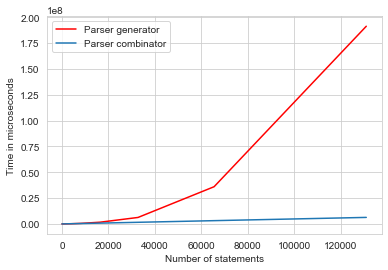

In [119]:
# plotting the results

sn.set_style('whitegrid')
plt.plot(set_of_numbers, gen_info.iloc[0], 'r', label = 'Parser generator')
plt.plot(set_of_numbers, comb_info.iloc[0], label = 'Parser combinator')
plt.xlabel('Number of statements')
plt.ylabel('Time in microseconds')
plt.legend()
plt.savefig('time_comparison.png', dpi = 500)
plt.show()

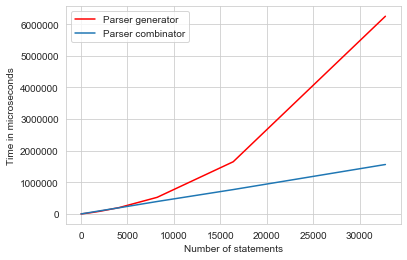

In [121]:
# plotting the results 2

sn.set_style('whitegrid')
plt.plot(set_of_numbers[:16], gen_info.iloc[0][:16], 'r', label = 'Parser generator')
plt.plot(set_of_numbers[:16], comb_info.iloc[0][:16], label = 'Parser combinator')
plt.xlabel('Number of statements')
plt.ylabel('Time in microseconds')
plt.legend()
plt.savefig('time_comparison_small.png', dpi = 500)
plt.show()

In [126]:
# get the ratio of each next iteration to previous and calculating mean of this results for each algo

from statistics import mean
gen_quotient = [gen_info.iloc[0][i]/gen_info.iloc[0][i-1] for i in range(1, len(gen_info.iloc[0]))]
comb_quotient = [comb_info.iloc[0][i]/comb_info.iloc[0][i-1] for i in range(1, len(comb_info.iloc[0]))]
mean(gen_quotient), mean(comb_quotient)

(2.425016639755953, 1.7418196871114286)

In [127]:
# from 16 generator test, ratio is constantly near 4.5, which is approximately 2 * 2 = 4 ~ 4.5
# so we approximately take gen parser complexity as O(n^2)

gen_quotient, comb_quotient

([0.5630397236614854,
  1.0950920245398772,
  1.392156862745098,
  1.6096579476861168,
  1.76625,
  1.7275300778485492,
  1.8344940598115527,
  1.9131308619919607,
  2.0305824676082644,
  2.077029202115429,
  2.2337263367651943,
  2.3570605508679328,
  2.6240143821358735,
  3.14515948091077,
  3.788396484856437,
  5.754585764270507,
  5.31337664803615],
 [0.9355742296918768,
  1.1197604790419162,
  1.2740641711229947,
  1.5036726128016789,
  1.5764131193300768,
  1.573262505533422,
  1.7754642656162072,
  1.929635499207607,
  1.950886990801577,
  1.9685947629872864,
  2.0159745092168855,
  1.964867244433601,
  2.0177347082006154,
  1.9607459631566977,
  2.0294138115960423,
  2.017436203640012,
  1.9974336045157894])